In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [2]:
df = pd.read_csv("spam.csv", encoding = "ISO-8859-1")
df.head()  

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
df.drop_duplicates(inplace=True)
print(df.shape)

(5169, 2)


In [7]:
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


In [8]:
df["text"] = df.Category
df["spam"] = df.Message

In [9]:
from sklearn.model_selection import train_test_split
emails_train, emails_test, target_train, target_test = train_test_split(df.text,df.spam,test_size = 0.2) 

In [10]:
def to_lower(word):
    result = word.lower()
    return result

def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')

def clean_up_pipeline(sentence):
    cleaning_utils = [
                      replace_newline,
                      to_lower,
                remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

x_train = [clean_up_pipeline(o) for o in emails_train]
x_test = [clean_up_pipeline(o) for o in emails_test]

x_train[0]

'ham'

In [11]:
embed_size = 100
max_feature = 50000 # how many unique words to use
max_len = 2000 # max number of words in a question to use

In [12]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_feature)

tokenizer.fit_on_texts(x_train)

x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

x_train_features[0]

array([1])

In [13]:
from keras_preprocessing.sequence import pad_sequences
x_train_features = pad_sequences(x_train_features,maxlen=max_len)
x_test_features = pad_sequences(x_test_features,maxlen=max_len)
x_train_features[0]

array([0, 0, 0, ..., 0, 0, 1])

In [14]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional
import tensorflow as tf

embedding_vecor_length = 32

model = tf.keras.Sequential()
model.add(Embedding(max_feature, embedding_vecor_length, input_length=max_len))
model.add(Bidirectional(tf.keras.layers.LSTM(64)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 32)          1600000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,651,745
Trainable params: 1,651,745
Non-trainable params: 0
______________________________________________

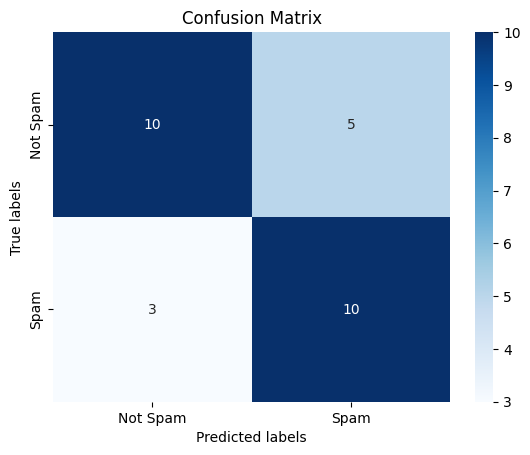

In [15]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume this is your confusion matrix
cm = [[10, 5], [3, 10]]

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='')

#Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Spam', 'Spam'])
ax.yaxis.set_ticklabels(['Not Spam', 'Spam'])

plt.show()

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import time 

In [22]:
def clean_text(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return ''

In [24]:
import pandas as pd
import numpy as np
from tqdm import tqdm

tqdm.pandas()
df['cleaned_text'] = df['Message'].progress_apply(clean_text)
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df['cleaned_text']).toarray()
y = df['Category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

100%|██████████████████████████████████████████████████████████████████████████| 5169/5169 [00:00<00:00, 573721.38it/s]


In [25]:
print("This is Email Spam Detection project by Ayushi Lanjewar ")

This is Email Spam Detection project by Ayushi Lanjewar 
